# **Understanding Loss Functions and Optimizers in Keras**
This Notebook provides an in-depth exploration of loss functions and optimizers in Keras, which are critical components in training deep learning models. We'll delve into different types of loss functions, when to use them, and various optimizers available in Keras, including how and why to choose specific ones for your projects.

## Introduction to Loss Functions
Loss functions, also known as cost functions, measure how well the model's predictions match the target labels. During training, the model strives to minimize the loss function, adjusting its weights accordingly.

### Common Loss Functions in Keras
* **Mean Squared Error (MSE)**: Used for regression tasks.
* **Binary Crossentropy**: Used for binary classification tasks.
* **Categorical Crossentropy**: Used for multi-class classification tasks where each class is mutually exclusive.
* **Sparse Categorical Crossentropy**: Similar to Categorical Crossentropy but for integer targets rather than one-hot encoded.

### Choosing the Right Loss Function
The choice of loss function depends on the specific type of machine learning task (e.g., classification, regression) and the data format.

## Introduction to Optimizers
Optimizers are algorithms or methods used to change the attributes of the neural network, such as weights and learning rate, to reduce the losses. Optimizers help to minimize (or maximize) the loss function.

### Common Optimizers in Keras
* **SGD (Stochastic Gradient Descent)**: Implements the stochastic gradient descent optimization algorithm.
* **Adam**: An optimizer that computes adaptive learning rates for each parameter.
* **RMSprop**: Maintains a moving average of the square of gradients and divides the gradient by the root of this average.

### Choosing the Right Optimizer
The choice of optimizer can significantly affect the model's performance and training time. Adam is a good default to start with.

## Exploring Loss Functions and Optimizers in Keras
Let's dive into some examples to see how to use these loss functions and optimizers in Keras.

### Setting Up a Simple Model
First, let's create a simple neural network model for demonstration purposes.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


### Configuring the Model with a Loss Function and Optimizer
Now, we configure the model with a loss function and optimizer. We'll also specify metrics to monitor during training.

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Regression Example with MSE and SGD
For a regression model, you might use MSE as the loss function and SGD as the optimizer.

In [7]:
model.compile(
    optimizer='sgd',
    loss='mean_squared_error'
)

### Binary Classification Example with Binary Crossentropy
For a binary classification model, Binary Crossentropy is an appropriate loss function.

In [8]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Comparing Model Performances with Different Loss Functions and Optimizers

This example demonstrates the impact of different loss functions and optimizers on model accuracy using the Fashion MNIST dataset.


In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [10]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Building and Training the First Model

We'll start with a model using Categorical Crossentropy as the loss function and the SGD optimizer.


In [11]:
# Define the model architecture
model_1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_1.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
history_1 = model_1.fit(train_images, train_labels, epochs=10, validation_split=0.2)


c:\Users\AlxMa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6596 - loss: 1.0754 - val_accuracy: 0.8010 - val_loss: 0.5829
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8101 - loss: 0.5622 - val_accuracy: 0.8231 - val_loss: 0.5124
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8275 - loss: 0.5001 - val_accuracy: 0.8300 - val_loss: 0.4782
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8403 - loss: 0.4586 - val_accuracy: 0.8399 - val_loss: 0.4546
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8460 - loss: 0.4500 - val_accuracy: 0.8432 - val_loss: 0.4547
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8493 - loss: 0.4296 - val_accuracy: 0.8500 - val_loss: 0.4290
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8579 - loss: 0.4146 - val_accuracy: 0.8495 - val_loss: 0.4229
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8577 - loss: 0.4050 - 

### Building and Training the Second Model

Next, we'll use the same loss function but switch to the Adam optimizer, which adjusts the learning rate dynamically.


In [12]:
# Define the model architecture
model_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
history_2 = model_2.fit(train_images, train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7712 - loss: 0.6514 - val_accuracy: 0.8561 - val_loss: 0.4095
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8583 - loss: 0.3928 - val_accuracy: 0.8656 - val_loss: 0.3686
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8743 - loss: 0.3469 - val_accuracy: 0.8497 - val_loss: 0.4307
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8807 - loss: 0.3251 - val_accuracy: 0.8761 - val_loss: 0.3347
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8896 - loss: 0.2992 - val_accuracy: 0.8799 - val_loss: 0.3397
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8955 - loss: 0.2852 - val_accuracy: 0.8803 - val_loss: 0.3366
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8976 - loss: 0.2724 - val_accuracy: 0.8750 - val_loss: 0.3486
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9036 - loss: 0.2603 - 

### Visualizing the Accuracy of Both Models

After training both models, let's plot their validation accuracies to observe the differences.


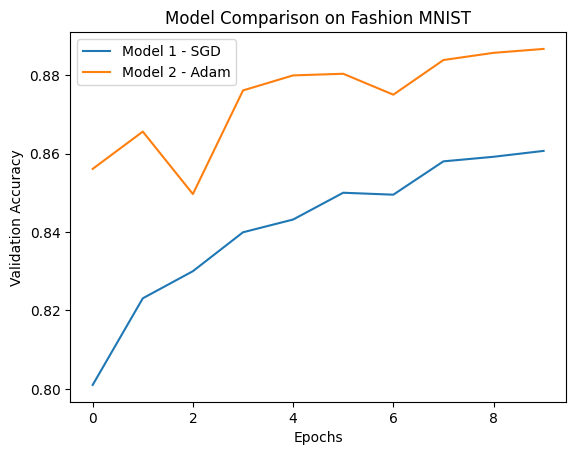

In [13]:
import matplotlib.pyplot as plt

plt.plot(history_1.history['val_accuracy'], label='Model 1 - SGD')
plt.plot(history_2.history['val_accuracy'], label='Model 2 - Adam')
plt.title('Model Comparison on Fashion MNIST')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

Through this comparison, we observe how the choice of optimizer can significantly impact the model's learning and generalization capabilities, even when the loss function remains constant. Model 2, which uses the Adam optimizer, typically shows a faster improvement in accuracy due to its adaptive learning rate capabilities, illustrating the importance of selecting an appropriate optimizer for your model.


| Loss Function                  | Keras Function Name              | Typical Use Case                                     |
|--------------------------------|----------------------------------|------------------------------------------------------|
| Mean Squared Error             | `mean_squared_error` or `mse`    | Regression tasks where the goal is to minimize the square of the difference between the targets and the predictions. |
| Mean Absolute Error            | `mean_absolute_error` or `mae`   | Regression tasks, similar to MSE, but less sensitive to outliers since it focuses on the absolute difference. |
| Binary Crossentropy            | `binary_crossentropy`            | Binary classification tasks. Useful when predicting the probability of two mutually exclusive outcomes. |
| Categorical Crossentropy       | `categorical_crossentropy`       | Multi-class classification tasks where each sample belongs to one of C classes. Requires one-hot encoded labels. |
| Sparse Categorical Crossentropy| `sparse_categorical_crossentropy`| Similar to Categorical Crossentropy but accepts integer targets, simplifying the handling of large categorical label sets. |
| Kullback-Leibler Divergence    | `kullback_leibler_divergence` or `kld` | Measuring how one probability distribution diverges from a second, expected probability distribution. Useful in variational autoencoders and other generative models. |
| Cosine Similarity              | `cosine_similarity`              | Evaluating the cosine of the angle between true and predicted values. Useful in recommendation systems and embeddings similarity. |


| Optimizer        | Keras Function Name | Description                                                                                       | Typical Use Case                                           |
|------------------|---------------------|---------------------------------------------------------------------------------------------------|------------------------------------------------------------|
| SGD              | `SGD`               | Stochastic Gradient Descent optimizer. Can include momentum and nesterov acceleration.            | Simple problems, provides fine control over the learning process. |
| Adam             | `Adam`              | Optimizer that computes adaptive learning rates for each parameter. Combines ideas from RMSProp and AdaGrad. | Most deep learning tasks. Robust and easy to use.          |
| RMSprop          | `RMSprop`           | Maintains a moving average of the square of gradients, dividing the gradient by the root of this average. | Situations where the importance of parameters changes dynamically. |
| Adagrad          | `Adagrad`           | Adapts the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters. | Sparse data (e.g., text and images with lots of zeros).    |
| Adadelta         | `Adadelta`          | An extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate. | Problems requiring robustness to noisy gradient information. |
| Adamax           | `Adamax`            | A variant of Adam based on the infinity norm.                                                     | Situations where the infinity norm offers better behavior than the L2 norm used in Adam. |
| Nadam            | `Nadam`             | Incorporates Nesterov momentum into Adam.                                                         | Deep learning tasks where Nesterov momentum offers advantages. |
| FTRL             | `FTRL`              | Follow The Regularized Leader algorithm, particularly suited for large-scale linear models.       | Large-scale and sparse machine learning models, especially with categorical data. |
